In [1]:
!nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Mon Jan  2 09:24:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |      

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/DD2360/lab3'
!ls

Mounted at /content/drive
/content/drive/MyDrive/DD2360/lab3
histogram.txt  lab3_ex3  lab3_ex3.cu  test.txt


In [3]:
!nvcc -arch=sm_75 ./lab3_ex3.cu -o lab3_ex3
!./lab3_ex3 131072

The input length is 131072
CPU and GPU results are equal.


In [4]:
!/usr/local/cuda-11/bin/nv-nsight-cu-cli ./lab3_ex3 1024

The input length is 1024
==PROF== Connected to process 1829 (/content/drive/MyDrive/DD2360/lab3/lab3_ex3)
==PROF== Profiling "histogram_kernel" - 1: 0%....50%....100% - 8 passes
==PROF== Profiling "convert_kernel" - 2: 0%....50%....100% - 8 passes
CPU and GPU results are equal.
==PROF== Disconnected from process 1829
[1829] lab3_ex3@127.0.0.1
  histogram_kernel(unsigned int*, unsigned int*, unsigned int, unsigned int), 2023-Jan-02 09:27:22, Context 1, Stream 7
    Section: GPU Speed Of Light
    ---------------------------------------------------------------------- --------------- ------------------------------
    DRAM Frequency                                                           cycle/nsecond                           4.76
    SM Frequency                                                             cycle/usecond                         561.98
    Elapsed Cycles                                                                   cycle                          2,177
    Memory [%] 

In [ ]:
!nvprof ./lab3_ex3 131072

The input length is 131072
==511== NVPROF is profiling process 511, command: ./lab3_ex3 131072
CPU and GPU results are equal.
==511== Profiling application: ./lab3_ex3 131072
==511== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   59.24%  46.047us         1  46.047us  46.047us  46.047us  [CUDA memcpy HtoD]
                   24.87%  19.328us         1  19.328us  19.328us  19.328us  histogram_kernel(unsigned int*, unsigned int*, unsigned int, unsigned int)
                    6.42%  4.9920us         1  4.9920us  4.9920us  4.9920us  [CUDA memset]
                    5.35%  4.1600us         1  4.1600us  4.1600us  4.1600us  convert_kernel(unsigned int*, unsigned int)
                    4.12%  3.2000us         1  3.2000us  3.2000us  3.2000us  [CUDA memcpy DtoH]
      API calls:   99.53%  257.99ms         2  129.00ms  3.6130us  257.99ms  cudaMalloc
                    0.15%  385.19us         2  192.60us  23.641us  361.55

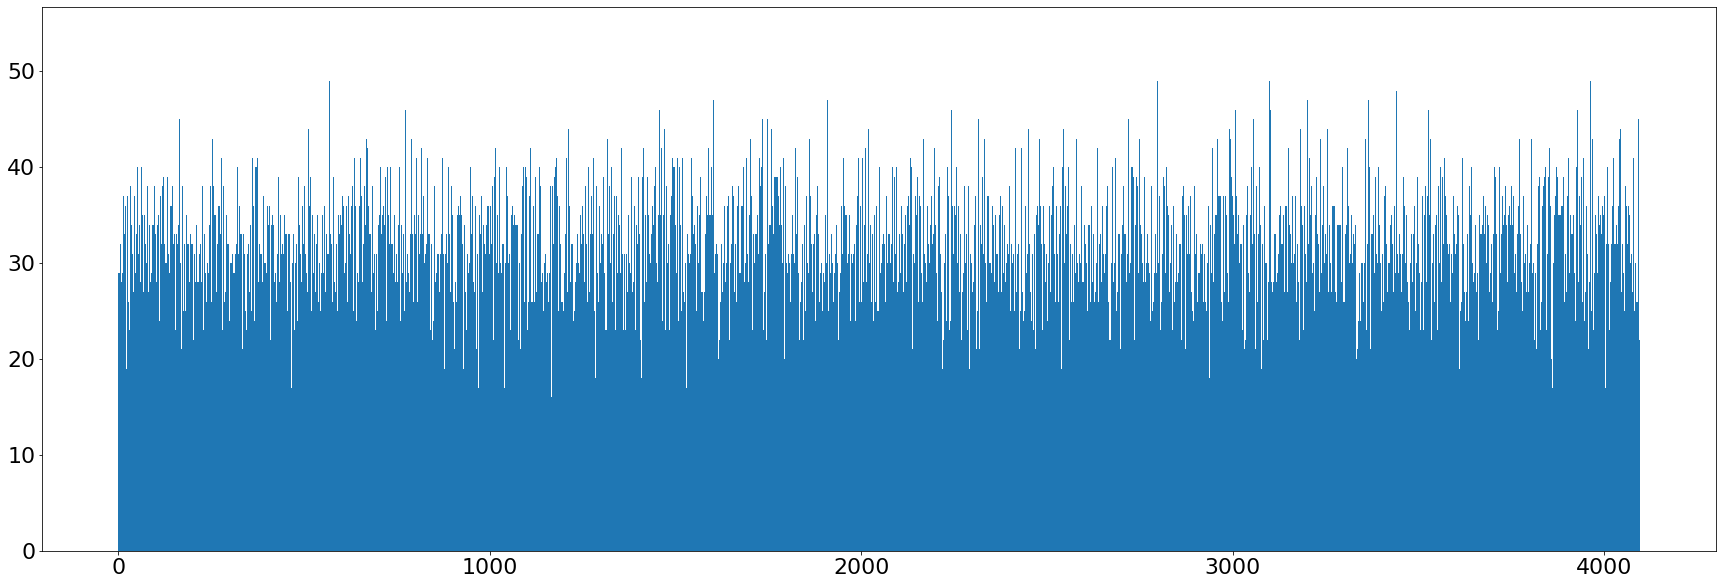

In [ ]:
import matplotlib.pyplot as plt

with open('./histogram.txt') as f:
    histogram = [int(line.rstrip()) for line in f]

plt.rcParams.update({'font.size': 22})
fig = plt.gcf()
bins = list(range(1,len(histogram)+1))
plt.bar(bins, histogram, width=1.0)
fig.set_size_inches(30, 10, forward=True)
plt.show()
     